<a href="https://colab.research.google.com/github/vishnuprasad-vp/ecommerce-sales-analysis/blob/main/Final_project_Sales_Analytics_for_Business_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧭 Project Title  

## **From Data to Decisions: Sales Analytics for Business Impact**  

An end-to-end **Sales & E-commerce** analysis using multi-source datasets (domestic, international, inventory, expenses, and pricing).  

---


# 📝 1. Introduction  

In today’s competitive e-commerce landscape, businesses generate massive amounts of transactional, pricing, and expense data.  
This project transforms raw data into actionable insights through systematic **Exploratory Data Analysis (EDA)**, cleaning, and visualization.  

# ❓ Problem Definition  

E-commerce businesses generate huge volumes of **sales, inventory, and expense data** every day.  
However, without proper analysis, this data remains **unstructured and underutilized**.  

Key problems addressed:  
- Lack of visibility into sales performance (domestic vs international)  
- Difficulty identifying top products, categories, and SKUs  
- Challenges in aligning inventory with demand  
- Rising operational and logistics costs  
- Ineffective pricing and discount strategies  


### **Project Objectives**  
- Professional data cleaning & preprocessing on messy, real datasets  
- Exploratory Data Analysis (EDA) that answers practical business questions  
- Clear Seaborn visualizations with actionable summaries  

### **Business Goals**  
1. Understand sales trends by time, channel, product, and region  
2. Identify top categories/SKUs and align inventory  
3. Compare domestic vs. international sales performance  
4. Review expenses and cost structure  
5. Deliver data-driven recommendations for growth  

---


# 💡 Solution  

This project applies **data cleaning, preprocessing, and exploratory data analysis (EDA)** to extract business insights.  

Steps taken:  
1. Clean messy real-world datasets (Amazon, International, Inventory, Expenses, Pricing, Warehouse)  
2. Standardize formats, handle missing values, and remove duplicates  
3. Aggregate sales data across months, categories, and geographies  
4. Use Seaborn/Matplotlib visualizations to highlight trends and anomalies  
5. Generate actionable insights for decision-making  

The solution demonstrates how raw data can be transformed into **strategic decisions**.  


# 📊 2. Dataset Description  

This project uses the **Unlock Profits with E-Commerce Sales Data** dataset:  
🔗 [Kaggle Dataset Link](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data)  

The dataset includes:  
- Amazon Sales  
- International Sales  
- Inventory (Sale Report)  
- Pricing Snapshots (May-2022, March-2021 P&L)  
- Expense Reports  
- Cloud Warehouse Cost Comparison  

Together, these provide a **360° view** of business performance.  

---


# 🏷️ 3. Attribute Information  

### Amazon Sale Report  
- Order ID, Date, Status, SKU, Qty, Amount, Category, Size, Color, Ship-state, Fulfilment  

### International Sale Report  
- DATE, CUSTOMER, SKU, PCS, RATE, GROSS AMT  

### Sale Report (Inventory)  
- SKU Code, Category, Size, Color, Stock  

### Pricing Files  
- MRPs, Selling Price, Final MRP  

### Expense IIGF.csv  
- Date, Expense Type, Amount  

### Cloud Warehouse Comparison  
- Service, Price_per_Unit  

---


# 💻 4. Mount Google Drive  

Since datasets are stored in Google Drive, we first mount the drive to access files in Colab.  


In [ ]:
# Mount Google Drive (Colab) so files in your Drive can be accessed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 💻 5. Import Libraries  

We import key Python libraries:  
- **pandas** for data handling  
- **numpy** for numerical processing  
- **seaborn** for visualizations  
- **matplotlib** for plotting backend  


In [ ]:
# === Libraries & display settings ===
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn visual style
sns.set_theme(style="whitegrid", palette="muted")

# Pandas display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 160)

# 📂 6. Import Datasets  

Now we load all CSV files from Google Drive into Pandas DataFrames.  
We also print their shapes to confirm correct loading.  


In [ ]:
# === Set path to your Drive folder and check files ===
base_path = "/content/drive/MyDrive/project files"   # <- change if needed

expected_files = [
    "Sale Report.csv",
    "International sale Report.csv",
    "Amazon Sale Report.csv",
    "May-2022.csv",
    "P  L March 2021.csv",
    "Expense IIGF.csv",
    "Cloud Warehouse Compersion Chart.csv"
]

print("Files present in folder:", base_path)
for f in sorted(os.listdir(base_path)):
    print("-", f)

# report missing expected files
missing = [f for f in expected_files if not os.path.exists(os.path.join(base_path, f))]
if missing:
    print("\nWARNING: Missing files (make sure these are uploaded):")
    for m in missing:
        print("-", m)
else:
    print("\nAll expected files found.")


Files present in folder: /content/drive/MyDrive/project files
- Amazon Sale Report.csv
- Cloud Warehouse Compersion Chart.csv
- Expense IIGF.csv
- International sale Report.csv
- May-2022.csv
- P  L March 2021.csv
- Sale Report.csv
- cleaned_amazon_cancelled.csv
- cleaned_amazon_final.csv
- cleaned_cloud.csv
- cleaned_expenses.csv
- cleaned_international_final.csv
- cleaned_inventory.csv

All expected files found.


In [ ]:
# Robust CSV loader (tries common encodings/separators)
def smart_read_csv(path):
    encs = ['utf-8','latin1','cp1252','utf-16']
    seps = [',',';','\t','|']
    for enc in encs:
        for sep in seps:
            try:
                df = pd.read_csv(path, encoding=enc, sep=sep, low_memory=False)
                if df.shape[1] >= 2:
                    return df
            except Exception:
                continue
    # last resort
    return pd.read_csv(path, low_memory=False)

# Load datasets
df_sale = smart_read_csv(os.path.join(base_path, "Sale Report.csv"))
df_intl = smart_read_csv(os.path.join(base_path, "International sale Report.csv"))
df_amzn = smart_read_csv(os.path.join(base_path, "Amazon Sale Report.csv"))
df_may  = smart_read_csv(os.path.join(base_path, "May-2022.csv"))
df_pl   = smart_read_csv(os.path.join(base_path, "P  L March 2021.csv"))
df_exp  = smart_read_csv(os.path.join(base_path, "Expense IIGF.csv"))
df_cloud= smart_read_csv(os.path.join(base_path, "Cloud Warehouse Compersion Chart.csv"))

# Quick shapes
print("Shapes:")
print("Sale Report:", df_sale.shape)
print("International:", df_intl.shape)
print("Amazon:", df_amzn.shape)
print("May-2022:", df_may.shape)
print("P&L Mar2021:", df_pl.shape)
print("Expenses:", df_exp.shape)
print("Cloud:", df_cloud.shape)

Shapes:
Sale Report: (9271, 7)
International: (37432, 10)
Amazon: (128975, 24)
May-2022: (1330, 17)
P&L Mar2021: (1330, 18)
Expenses: (17, 5)
Cloud: (50, 4)


# 🔍 7. Exploratory Data Analysis (EDA): Initial Overview  

We check:  
- Column names  
- Missing values  
- Data types  
- First few rows  





In [ ]:
# Helper to inspect DataFrames
def overview(df, name, n=3):
    print(f"\n=== {name} (shape={df.shape}) ===")
    print("Columns:", list(df.columns)[:40])
    print("\nMissing counts (top 10):")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("\nDtypes:")
    print(df.dtypes.head(15))
    display(df.head(n))
    print("-"*50)

overview(df_sale, "Sale Report")
overview(df_intl, "International Sale Report")
overview(df_amzn, "Amazon Sale Report")
overview(df_may, "May-2022")
overview(df_pl, "P L March 2021")
overview(df_exp, "Expense IIGF")
overview(df_cloud, "Cloud Warehouse")



=== Sale Report (shape=(9271, 7)) ===
Columns: ['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size', 'Color']

Missing counts (top 10):
SKU Code      83
Color         45
Category      45
Stock         36
Design No.    36
Size          36
index          0
dtype: int64

Dtypes:
index           int64
SKU Code       object
Design No.     object
Stock         float64
Category       object
Size           object
Color          object
dtype: object


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red


--------------------------------------------------

=== International Sale Report (shape=(37432, 10)) ===
Columns: ['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS', 'RATE', 'GROSS AMT']

Missing counts (top 10):
SKU          2474
CUSTOMER     1040
RATE         1040
PCS          1040
Style        1040
Size         1040
GROSS AMT    1040
Months         25
DATE            1
index           0
dtype: int64

Dtypes:
index         int64
DATE         object
Months       object
CUSTOMER     object
Style        object
SKU          object
Size         object
PCS          object
RATE         object
GROSS AMT    object
dtype: object


,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00


--------------------------------------------------

=== Amazon Sale Report (shape=(128975, 24)) ===
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

Missing counts (top 10):
fulfilled-by        89698
promotion-ids       49153
Unnamed: 22         49050
currency             7795
Amount               7795
Courier Status       6872
ship-country           33
ship-city              33
ship-state             33
ship-postal-code       33
dtype: int64

Dtypes:
index                  int64
Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel         object
ship-service-level    object
Style                 object
SKU                   object
Category           

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


--------------------------------------------------

=== May-2022 (shape=(1330, 17)) ===
Columns: ['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']

Missing counts (top 10):
index            0
Sku              0
Style Id         0
Catalog          0
Category         0
Weight           0
TP               0
MRP Old          0
Final MRP Old    0
Ajio MRP         0
dtype: int64

Dtypes:
index              int64
Sku               object
Style Id          object
Catalog           object
Category          object
Weight            object
TP                object
MRP Old           object
Final MRP Old     object
Ajio MRP          object
Amazon MRP        object
Amazon FBA MRP    object
Flipkart MRP      object
Limeroad MRP      object
Myntra MRP        object
dtype: object


,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


--------------------------------------------------

=== P L March 2021 (shape=(1330, 18)) ===
Columns: ['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP 1', 'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']

Missing counts (top 10):
index            0
Sku              0
Style Id         0
Catalog          0
Category         0
Weight           0
TP 1             0
TP 2             0
MRP Old          0
Final MRP Old    0
dtype: int64

Dtypes:
index              int64
Sku               object
Style Id          object
Catalog           object
Category          object
Weight            object
TP 1              object
TP 2              object
MRP Old           object
Final MRP Old     object
Ajio MRP          object
Amazon MRP        object
Amazon FBA MRP    object
Flipkart MRP      object
Limeroad MRP      object
dtype: object


,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


--------------------------------------------------

=== Expense IIGF (shape=(17, 5)) ===
Columns: ['index', 'Recived Amount', 'Unnamed: 1', 'Expance', 'Unnamed: 3']

Missing counts (top 10):
Recived Amount    11
Unnamed: 1        11
Expance            2
index              0
Unnamed: 3         0
dtype: int64

Dtypes:
index              int64
Recived Amount    object
Unnamed: 1        object
Expance           object
Unnamed: 3        object
dtype: object


,index,Recived Amount,Unnamed: 1,Expance,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,06-19-22,1000,Large Bag,380
2,2,06-20-22,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170


--------------------------------------------------

=== Cloud Warehouse (shape=(50, 4)) ===
Columns: ['index', 'Shiprocket', 'Unnamed: 1', 'INCREFF']

Missing counts (top 10):
Shiprocket    29
INCREFF       22
Unnamed: 1     9
index          0
dtype: int64

Dtypes:
index          int64
Shiprocket    object
Unnamed: 1    object
INCREFF       object
dtype: object


,index,Shiprocket,Unnamed: 1,INCREFF
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11


--------------------------------------------------


# 🧹 8. Data Pre-processing  

Steps:  
1. Handle missing values  
2. Remove duplicates  
3. Fix data types  
4. Create derived columns (Year, Month, Flags)  
5. Filter shipped orders for analysis  


In [ ]:
# Standardize column names (strip whitespace)
def clean_colnames(df):
    df = df.copy()
    df.columns = [str(c).strip() for c in df.columns]
    return df

df_sale = clean_colnames(df_sale)
df_intl = clean_colnames(df_intl)
df_amzn = clean_colnames(df_amzn)
df_may  = clean_colnames(df_may)
df_pl   = clean_colnames(df_pl)
df_exp  = clean_colnames(df_exp)
df_cloud= clean_colnames(df_cloud)

# Conversion helpers
def to_datetime_any(col):
    return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)

def to_numeric_col(col):
    return pd.to_numeric(col.astype(str).str.replace(r'[^0-9\.-]','', regex=True), errors='coerce')

In [ ]:
# Clean inventory (Sale Report)
inv = df_sale.copy()
# Remove common unwanted columns if present
for c in ['index','Index','Unnamed: 0']:
    if c in inv.columns:
        inv = inv.drop(columns=[c], errors='ignore')

# Standardize SKU and Stock
sku_candidates = [c for c in inv.columns if 'sku' in c.lower() or 'sku code' in c.lower()]
if sku_candidates:
    inv['SKU'] = inv[sku_candidates[0]].astype(str).str.strip().str.upper()
else:
    inv['SKU'] = inv.get('SKU','').astype(str).str.strip().str.upper()

if 'Stock' in inv.columns:
    inv['Stock'] = to_numeric_col(inv['Stock'])
else:
    inv['Stock'] = np.nan

# Clean Category/Size/Color columns if present
for c in ['Category','Size','Color','Design No.']:
    if c in inv.columns:
        inv[c] = inv[c].fillna('Unknown').astype(str).str.strip()

# Show cleaned inventory
overview(inv, "cleaned_inventory")



=== cleaned_inventory (shape=(9271, 7)) ===
Columns: ['SKU Code', 'Design No.', 'Stock', 'Category', 'Size', 'Color', 'SKU']

Missing counts (top 10):
SKU Code      83
Stock         36
Design No.     0
Category       0
Size           0
Color          0
SKU            0
dtype: int64

Dtypes:
SKU Code       object
Design No.     object
Stock         float64
Category       object
Size           object
Color          object
SKU            object
dtype: object


,SKU Code,Design No.,Stock,Category,Size,Color,SKU
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red,AN201-RED-L
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red,AN201-RED-M
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red,AN201-RED-S


--------------------------------------------------


In [ ]:
# Clean international sales
intl = df_intl.copy()

# Some files include repeated header rows; drop rows where DATE == 'DATE' or 'SKU'
if 'DATE' in intl.columns:
    intl = intl[intl['DATE'].astype(str).str.lower()!='date']

# Parse date
if 'DATE' in intl.columns:
    intl['order_date'] = to_datetime_any(intl['DATE'])
else:
    intl['order_date'] = pd.NaT

# Numeric columns
for c in ['PCS','PCS ','PCS.']:
    if c in intl.columns:
        intl['PCS'] = to_numeric_col(intl[c])
        break
if 'PCS' not in intl.columns:
    # try other common names
    for c in intl.columns:
        if 'pcs' in c.lower():
            intl['PCS'] = to_numeric_col(intl[c])
            break
intl['RATE'] = to_numeric_col(intl['RATE']) if 'RATE' in intl.columns else np.nan
amt_col = next((c for c in intl.columns if 'gross' in c.lower() and 'amt' in c.lower()), None)
if amt_col:
    intl['GROSS_AMT'] = to_numeric_col(intl[amt_col])
else:
    intl['GROSS_AMT'] = np.nan

# SKU / Style normalization
sku_col = next((c for c in intl.columns if 'sku' in c.lower() or 'style' in c.lower()), None)
intl['SKU'] = intl[sku_col].astype(str).str.strip().str.upper() if sku_col else 'Unknown'

# Fill customer
if 'CUSTOMER' in intl.columns:
    intl['CUSTOMER'] = intl['CUSTOMER'].fillna('Unknown').astype(str).str.strip()

overview(intl, "cleaned_international")


/tmp/ipython-input-1594171211.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-1594171211.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)



=== cleaned_international (shape=(37432, 12)) ===
Columns: ['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS', 'RATE', 'GROSS AMT', 'order_date', 'GROSS_AMT']

Missing counts (top 10):
order_date    18797
GROSS_AMT      1041
PCS            1041
RATE           1041
Style          1040
Size           1040
GROSS AMT      1040
Months           25
DATE              1
index             0
dtype: int64

Dtypes:
index                  int64
DATE                  object
Months                object
CUSTOMER              object
Style                 object
SKU                   object
Size                  object
PCS                  float64
RATE                 float64
GROSS AMT             object
order_date    datetime64[ns]
GROSS_AMT            float64
dtype: object


,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,order_date,GROSS_AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004,L,1.0,616.56,617.00,2021-06-05,617.0
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004,XL,1.0,616.56,617.00,2021-06-05,617.0
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004,XXL,1.0,616.56,617.00,2021-06-05,617.0


--------------------------------------------------


In [ ]:
# Clean Amazon orders
amz = df_amzn.copy()

# Drop unnamed index columns
amz = amz.drop(columns=[c for c in amz.columns if 'Unnamed' in c], errors='ignore')

# Parse Date
date_candidates = [c for c in amz.columns if 'date' in c.lower()]
if date_candidates:
    amz['order_date'] = to_datetime_any(amz[date_candidates[0]])
else:
    amz['order_date'] = pd.NaT

# Qty & Amount
qty_col = next((c for c in amz.columns if c.lower() in ('qty','quantity','pcs')), None)
amt_col = next((c for c in amz.columns if 'amount' in c.lower() or 'total' in c.lower()), None)
amz['Qty'] = to_numeric_col(amz[qty_col]) if qty_col else np.nan
amz['Amount'] = to_numeric_col(amz[amt_col]) if amt_col else np.nan

# Status & SKU
status_col = next((c for c in amz.columns if 'status' in c.lower()), None)
amz['Status'] = amz[status_col].astype(str).str.strip() if status_col else 'Unknown'
sku_col = next((c for c in amz.columns if 'sku' in c.lower() or 'style' in c.lower()), None)
amz['SKU'] = amz[sku_col].astype(str).str.strip().str.upper() if sku_col else 'Unknown'

# Category/Size/Color fill
for c in ['Category','Size','Color','ship-state','Fulfilment']:
    if c in amz.columns:
        amz[c] = amz[c].fillna('Unknown').astype(str).str.strip()

# Remove obvious header rows (if Date contains 'DATE' strings)
amz = amz[~amz['order_date'].astype(str).str.lower().str.contains('date')]

# Flags
amz['is_shipped'] = amz['Status'].str.contains('ship', case=False, na=False)
amz['is_cancelled'] = amz['Status'].str.contains('cancel', case=False, na=False) | amz['Status'].str.contains('pending', case=False, na=False)

# Deduplicate by key (Order ID + SKU + Qty + Amount) if columns present
key_cols = [c for c in ['Order ID','OrderID','order id','SKU','Qty','Amount'] if c in amz.columns or c.lower() in [x.lower() for x in amz.columns]]
# We'll drop full duplicates first
amz = amz.drop_duplicates()

overview(amz, "cleaned_amazon")


/tmp/ipython-input-1594171211.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-1594171211.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)



=== cleaned_amazon (shape=(128975, 26)) ===
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'order_date', 'is_shipped', 'is_cancelled']

Missing counts (top 10):
fulfilled-by        89698
promotion-ids       49153
currency             7795
Amount               7795
Courier Status       6872
ship-country           33
ship-city              33
ship-postal-code       33
index                   0
Order ID                0
dtype: int64

Dtypes:
index                  int64
Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel         object
ship-service-level    object
Style                 object
SKU                   object
Category              object
Size             

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,order_date,is_shipped,is_cancelled
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,2022-04-30,False,True
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-04-30,True,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,2022-04-30,True,False


--------------------------------------------------


In [ ]:
# Clean expenses
exp = df_exp.copy()
# if file had junk header row; try to detect
if 'Date' not in exp.columns and exp.shape[1] >= 3:
    # try possible structure: [Index, Date, Recieved, Expense, Amount]
    try:
        exp = pd.read_csv(os.path.join(base_path, "Expense IIGF.csv"), skiprows=1, header=None)
        exp.columns = ['Index','Date','Recieved','Expense','Amount']
    except Exception:
        pass

# try converting Date and Amount
if 'Date' in exp.columns:
    exp['Date'] = to_datetime_any(exp['Date'])
amt_col = next((c for c in exp.columns if 'amount' in c.lower()), None)
if amt_col:
    exp['Amount'] = to_numeric_col(exp[amt_col])
else:
    exp['Amount'] = np.nan

# Clean cloud dataset
cloud = df_cloud.copy()
# if first row is header duplicate, drop it
if cloud.shape[0] > 0 and cloud.iloc[0].astype(str).str.contains('Price').any():
    cloud = cloud.drop(index=0).reset_index(drop=True)
# Normalize columns: find price-like column
price_col = next((c for c in cloud.columns if 'price' in c.lower() or 'cost' in c.lower()), None)
if price_col:
    cloud['Price_per_Unit'] = to_numeric_col(cloud[price_col])
else:
    cloud['Price_per_Unit'] = np.nan

overview(exp, "cleaned_expenses")
overview(cloud, "cleaned_cloud")



=== cleaned_expenses (shape=(17, 5)) ===
Columns: ['Index', 'Date', 'Recieved', 'Expense', 'Amount']

Missing counts (top 10):
Date        13
Recieved    11
Expense      2
Amount       1
Index        0
dtype: int64

Dtypes:
Index                int64
Date        datetime64[ns]
Recieved            object
Expense             object
Amount             float64
dtype: object


/tmp/ipython-input-1594171211.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-1594171211.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(col, errors='coerce', infer_datetime_format=True)


,Index,Date,Recieved,Expense,Amount
0,0,NaT,Amount,Particular,NaN
1,1,2022-06-19,1000,Large Bag,380.0
2,2,2022-06-20,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170.0


--------------------------------------------------

=== cleaned_cloud (shape=(49, 5)) ===
Columns: ['index', 'Shiprocket', 'Unnamed: 1', 'INCREFF', 'Price_per_Unit']

Missing counts (top 10):
Price_per_Unit    49
Shiprocket        29
INCREFF           22
Unnamed: 1         9
index              0
dtype: int64

Dtypes:
index               int64
Shiprocket         object
Unnamed: 1         object
INCREFF            object
Price_per_Unit    float64
dtype: object


,index,Shiprocket,Unnamed: 1,INCREFF,Price_per_Unit
0,1,Inbound (Fresh Stock and RTO),₹4.00,4,NaN
1,2,Outbound,₹7.00,11,NaN
2,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day,NaN


--------------------------------------------------


In [ ]:
# Merge Amazon with inventory on standardized SKU
inv['SKU_STD'] = inv['SKU'].astype(str).str.strip().str.upper()
amz['SKU_STD'] = amz['SKU'].astype(str).str.strip().str.upper()
amz_merged = pd.merge(amz, inv.drop_duplicates('SKU_STD'), on='SKU_STD', how='left', suffixes=('','_inv'))

# Merge International with inventory
intl['SKU_STD'] = intl['SKU'].astype(str).str.strip().str.upper()
intl_merged = pd.merge(intl, inv.drop_duplicates('SKU_STD'), on='SKU_STD', how='left', suffixes=('','_inv'))

print("amz_merged shape:", amz_merged.shape)
print("intl_merged shape:", intl_merged.shape)
overview(amz_merged, "amz_merged (sample)")


amz_merged shape: (128975, 34)
intl_merged shape: (37432, 20)

=== amz_merged (sample) (shape=(128975, 34)) ===
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'order_date', 'is_shipped', 'is_cancelled', 'SKU_STD', 'SKU Code', 'Design No.', 'Stock', 'Category_inv', 'Size_inv', 'Color', 'SKU_inv']

Missing counts (top 10):
SKU Code         128830
Color            128830
SKU_inv          128830
Size_inv         128830
Stock            128830
Design No.       128830
Category_inv     128830
fulfilled-by      89698
promotion-ids     49153
currency           7795
dtype: int64

Dtypes:
index                  int64
Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel        

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,order_date,is_shipped,is_cancelled,SKU_STD,SKU Code,Design No.,Stock,Category_inv,Size_inv,Color,SKU_inv
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,2022-04-30,False,True,SET389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-04-30,True,False,JNE3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,2022-04-30,True,False,JNE3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------


In [ ]:
out_dir = base_path  # save cleaned CSVs back to same folder
amz_final = amz_merged[(amz_merged['is_shipped']==True) & (amz_merged['Amount']>0)].copy()
amz_cancel = amz_merged[amz_merged['is_cancelled']==True].copy()
intl_final = intl_merged[intl_merged['GROSS_AMT']>0].copy()

amz_final.to_csv(os.path.join(out_dir, "cleaned_amazon_final.csv"), index=False)
amz_cancel.to_csv(os.path.join(out_dir, "cleaned_amazon_cancelled.csv"), index=False)
intl_final.to_csv(os.path.join(out_dir, "cleaned_international_final.csv"), index=False)
inv.to_csv(os.path.join(out_dir, "cleaned_inventory.csv"), index=False)
exp.to_csv(os.path.join(out_dir, "cleaned_expenses.csv"), index=False)
cloud.to_csv(os.path.join(out_dir, "cleaned_cloud.csv"), index=False)

print("Saved cleaned files to:", out_dir)


Saved cleaned files to: /content/drive/MyDrive/project files


# 📊 9. Visualizations  

We now create at least **10 charts** using Seaborn:  
1. Line: Monthly revenue (Amazon vs International)  
2. Bar: Top categories  
3. Count plot: Order status distribution  
4. Histogram: Order amount distribution  
5. Boxplot: Amount by category  
6. Scatter: Qty vs Amount  
7. Heatmap: Correlation matrix  
8. Bar: Inventory by category  
9. Bar: Top SKUs by revenue  
10. Bar: Top expenses  
11. Subplots: Pricing comparison (2021 vs 2022)
12. Bar: Sales by top states

### 1. Monthly Revenue: Amazon vs International (line)






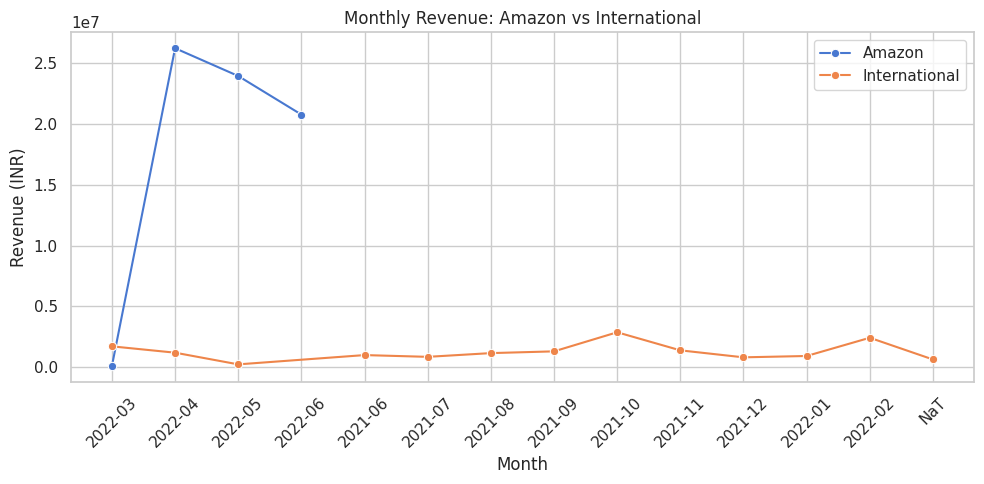

In [ ]:
# Monthly revenue (period)
amz_final['Month_Period'] = amz_final['order_date'].dt.to_period('M').astype(str)
intl_final['Month_Period'] = intl_final['order_date'].dt.to_period('M').astype(str)

amz_month_rev = amz_final.groupby('Month_Period')['Amount'].sum().sort_index()
intl_month_rev = intl_final.groupby('Month_Period')['GROSS_AMT'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=amz_month_rev.index, y=amz_month_rev.values, marker='o', label='Amazon')
sns.lineplot(x=intl_month_rev.index, y=intl_month_rev.values, marker='o', label='International')
plt.title("Monthly Revenue: Amazon vs International")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### 2. Top 10 Categories by Revenue (bar)

/tmp/ipython-input-2523534439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat.values, y=top_cat.index, palette='viridis')


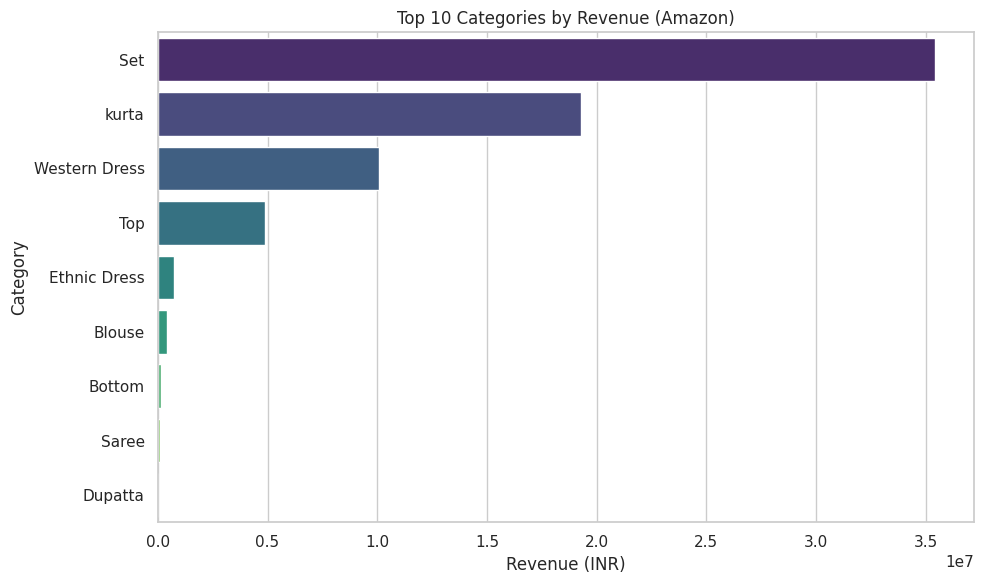

In [ ]:
plt.figure(figsize=(10,6))
top_cat = amz_final.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cat.values, y=top_cat.index, palette='viridis')
plt.title("Top 10 Categories by Revenue (Amazon)")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


### 3. Order Status Distribution (pie-like using countplot)

/tmp/ipython-input-1492521861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.values, y=status_counts.index, palette='pastel')


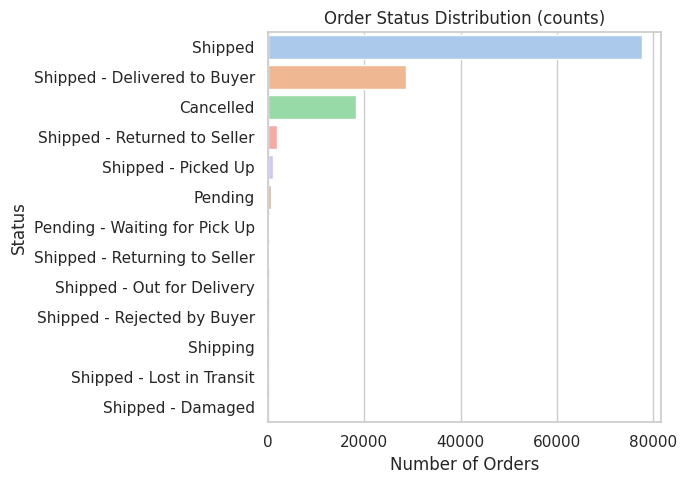

In [ ]:
plt.figure(figsize=(7,5))
status_counts = amz_merged['Status'].value_counts()
sns.barplot(x=status_counts.values, y=status_counts.index, palette='pastel')
plt.title("Order Status Distribution (counts)")
plt.xlabel("Number of Orders")
plt.ylabel("Status")
plt.tight_layout()
plt.show()


### 4. Order Amount Distribution (histogram + KDE)

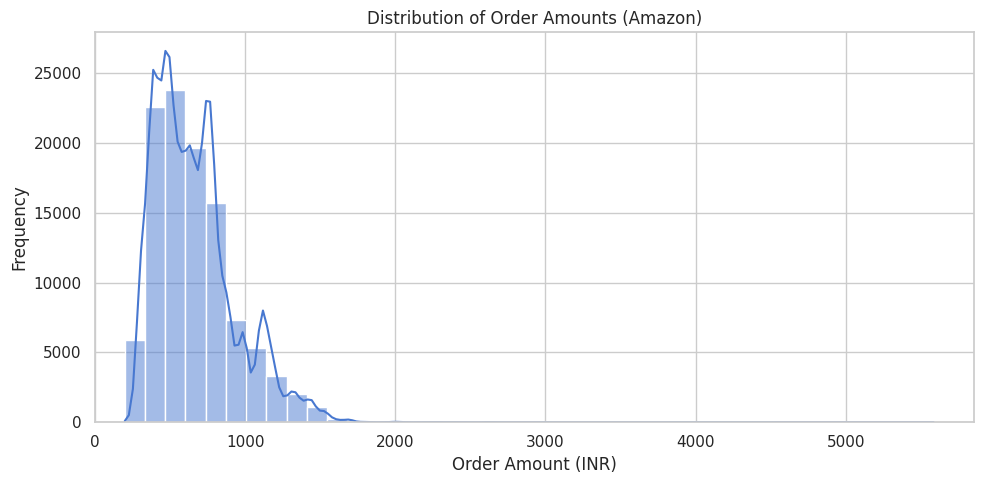

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(amz_final['Amount'], bins=40, kde=True)
plt.title("Distribution of Order Amounts (Amazon)")
plt.xlabel("Order Amount (INR)")
plt.ylabel("Frequency")
plt.xlim(left=0)
plt.tight_layout()
plt.show()


### 5. Boxplot: Amount by Category (top categories)

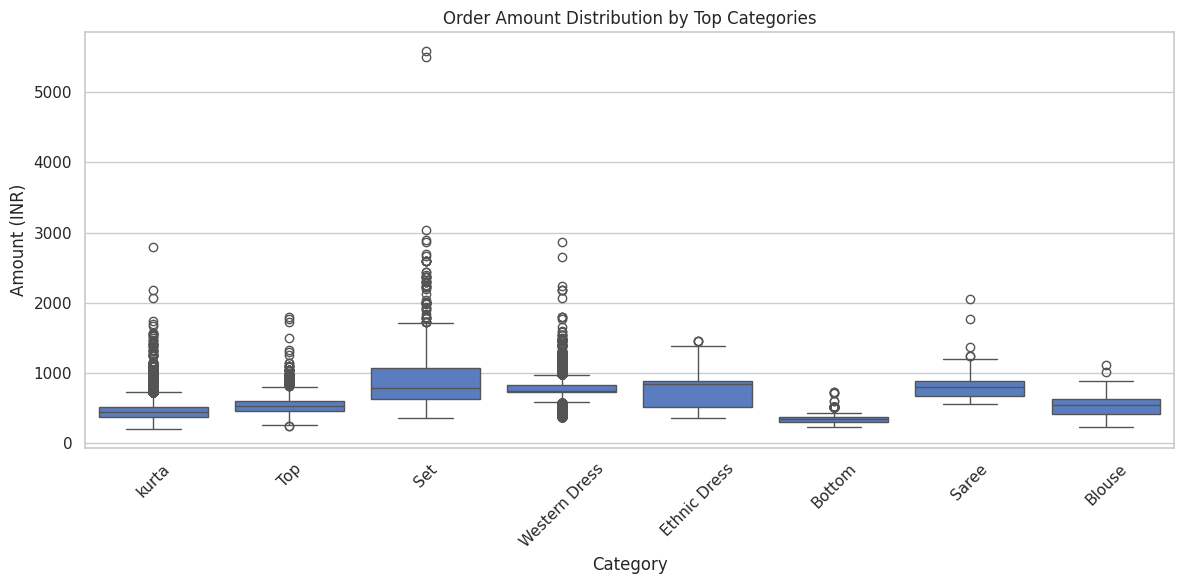

In [ ]:
top_cats = amz_final.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(8).index.tolist()
subset = amz_final[amz_final['Category'].isin(top_cats)]
plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='Category', y='Amount')
plt.title("Order Amount Distribution by Top Categories")
plt.xlabel("Category")
plt.ylabel("Amount (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Scatter: Qty vs Amount (with jitter)

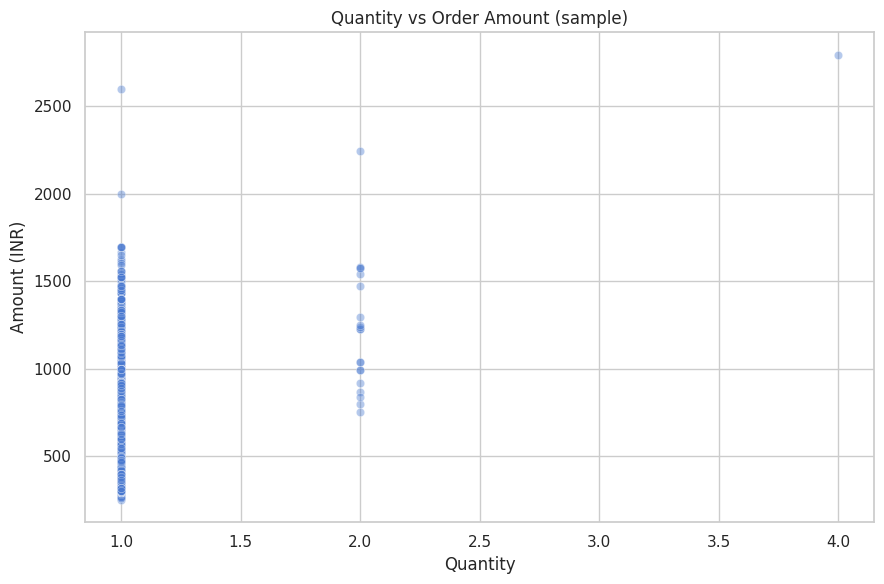

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=amz_final.sample(min(5000, len(amz_final))), x='Qty', y='Amount', alpha=0.4)
plt.title("Quantity vs Order Amount (sample)")
plt.xlabel("Quantity")
plt.ylabel("Amount (INR)")
plt.tight_layout()
plt.show()


### 7. Correlation heatmap (numeric fields)

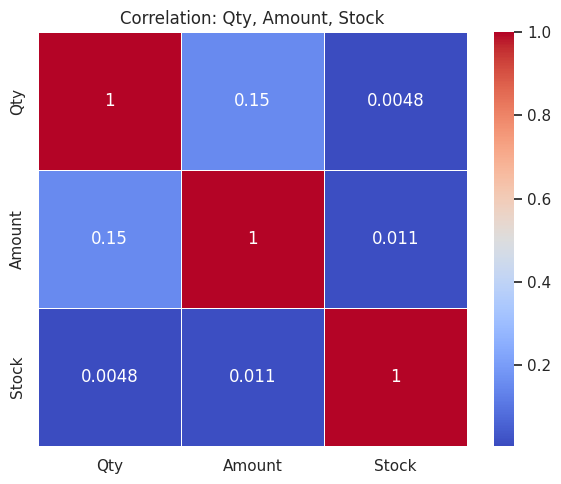

In [ ]:
num_df = amz_final[['Qty','Amount']].copy()
# join stock (if available) - take mean stock per SKU as a proxy
if 'Stock' in inv.columns:
    # create SKU stock map
    sku_stock = inv.groupby('SKU_STD')['Stock'].sum()
    amz_final['Stock'] = amz_final['SKU_STD'].map(sku_stock).fillna(0)
    num_df['Stock'] = amz_final['Stock']

plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation: Qty, Amount, Stock")
plt.tight_layout()
plt.show()


### 8. Inventory by Category (horizontal bar)**bold text**

/tmp/ipython-input-3853366064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_by_cat.values, y=stock_by_cat.index, palette='cubehelix')


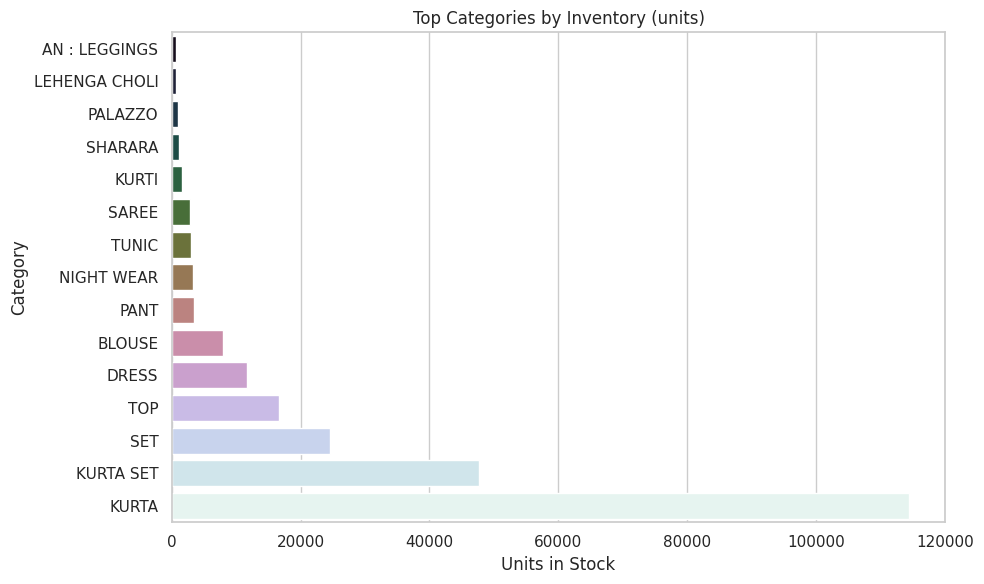

In [ ]:
plt.figure(figsize=(10,6))
stock_by_cat = inv.groupby('Category')['Stock'].sum().sort_values(ascending=True).tail(15)
sns.barplot(x=stock_by_cat.values, y=stock_by_cat.index, palette='cubehelix')
plt.title("Top Categories by Inventory (units)")
plt.xlabel("Units in Stock")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


### 9. Top 10 SKUs by Sales (bar)

/tmp/ipython-input-2266801047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sku_sales.values, y=sku_sales.index, palette='magma')


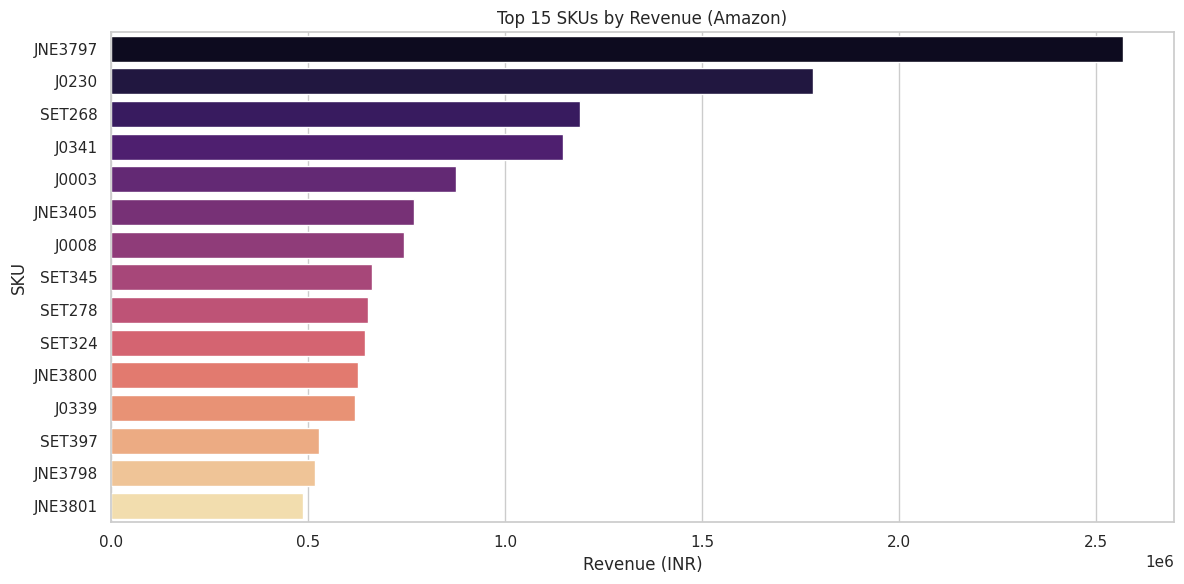

In [ ]:
plt.figure(figsize=(12,6))
sku_sales = amz_final.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=sku_sales.values, y=sku_sales.index, palette='magma')
plt.title("Top 15 SKUs by Revenue (Amazon)")
plt.xlabel("Revenue (INR)")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()


### 10. Expenses: Top categories

/tmp/ipython-input-1582498133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_by.values, y=exp_by.index, palette='Blues_r')


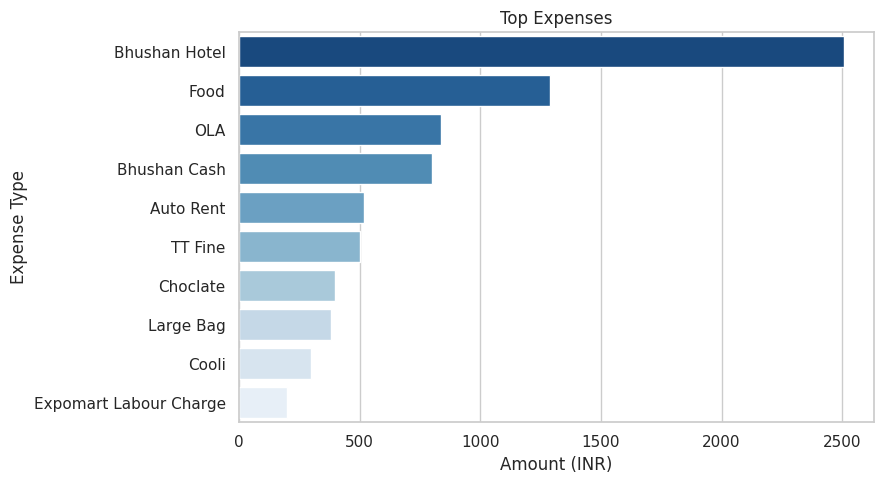

In [ ]:
plt.figure(figsize=(9,5))
exp_by = exp.groupby('Expense')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=exp_by.values, y=exp_by.index, palette='Blues_r')
plt.title("Top Expenses")
plt.xlabel("Amount (INR)")
plt.ylabel("Expense Type")
plt.tight_layout()
plt.show()


11. Pricing comparison (subplot: March 2021 vs May 2022)
### #

/tmp/ipython-input-1874267382.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p1.values, y=p1.index, ax=axes[0], palette='Oranges_r')
/tmp/ipython-input-1874267382.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p2.values, y=p2.index, ax=axes[1], palette='Greens_r')


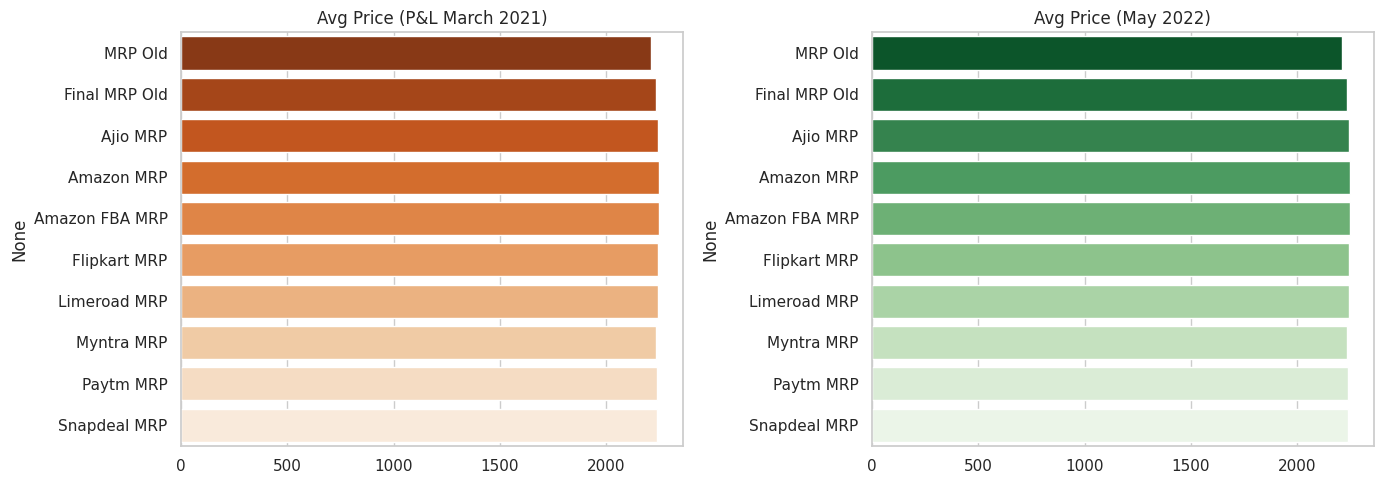

In [ ]:
# Basic approach: take numeric price columns means to compare
def avg_price_cols(df):
    numcols = [c for c in df.columns if any(x in c.lower() for x in ['mrp','price','final'])]
    if not numcols:
        return pd.Series()
    return df[numcols].apply(pd.to_numeric, errors='coerce').mean()

p1 = avg_price_cols(df_pl)
p2 = avg_price_cols(df_may)

fig, axes = plt.subplots(1,2, figsize=(14,5))
if not p1.empty:
    sns.barplot(x=p1.values, y=p1.index, ax=axes[0], palette='Oranges_r')
    axes[0].set_title("Avg Price (P&L March 2021)")
if not p2.empty:
    sns.barplot(x=p2.values, y=p2.index, ax=axes[1], palette='Greens_r')
    axes[1].set_title("Avg Price (May 2022)")
plt.tight_layout()
plt.show()


### 12. Sales by State (top 10) (if ship-state exists)

/tmp/ipython-input-2206433620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=states.values, y=states.index, palette='viridis')


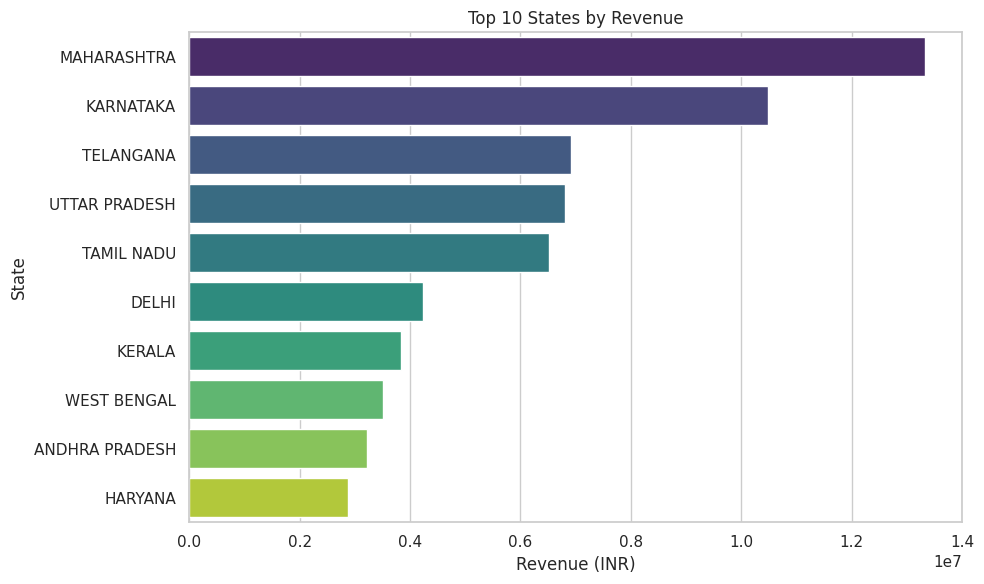

In [ ]:
if 'ship-state' in amz_merged.columns:
    plt.figure(figsize=(10,6))
    states = amz_merged.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=states.values, y=states.index, palette='viridis')
    plt.title("Top 10 States by Revenue")
    plt.xlabel("Revenue (INR)")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()
else:
    print("ship-state not present in merged Amazon data.")


Quick KPI summary and top **insights**

In [ ]:
# Basic KPIs
kpis = {}
kpis['total_amazon_revenue'] = amz_final['Amount'].sum()
kpis['total_amazon_orders'] = amz_final.shape[0]
kpis['total_intl_revenue'] = intl_final['GROSS_AMT'].sum()
kpis['total_intl_orders'] = intl_final.shape[0]

print("=== Key KPIs ===")
for k,v in kpis.items():
    print(f"{k}: {v:,}")

print("\nTop 5 Categories by Amazon revenue:")
display(amz_final.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5))

print("\nTop 5 SKUs by Amazon revenue:")
display(amz_final.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(5))


=== Key KPIs ===
total_amazon_revenue: 71,050,985.0
total_amazon_orders: 107,160
total_intl_revenue: 16,395,599.19
total_intl_orders: 34,311

Top 5 Categories by Amazon revenue:


,Amount
Category,
Set,35435987.0
kurta,19276245.0
Western Dress,10080922.0
Top,4864109.0
Ethnic Dress,727040.0



Top 5 SKUs by Amazon revenue:


,Amount
SKU,
JNE3797,2569843.0
J0230,1782193.0
SET268,1190796.0
J0341,1148577.0
J0003,875066.0


In [ ]:
# Optionally save charts programmatically. Example:
out_viz_dir = os.path.join(base_path, "charts")
os.makedirs(out_viz_dir, exist_ok=True)
# You can save figures by calling plt.savefig("path") in each plotting cell before plt.show()

print("Charts folder:", out_viz_dir)
print("Notebook complete — review visualizations and write your final narrative in Markdown cells.")


Charts folder: /content/drive/MyDrive/project files/charts
Notebook complete — review visualizations and write your final narrative in Markdown cells.


# 📌 Insight Summary  

- 📈 **Sales Trends**: Amazon dominates sales, but International markets show steady growth.  
- 🛒 **Top Categories**: Certain SKUs and categories drive most revenue, highlighting need for stock prioritization.  
- 🚚 **Order Fulfillment**: Cancellations and pending orders impact profitability.  
- 💰 **Expenses**: Logistics and warehousing are the largest cost components.  
- 🎯 **Pricing**: Channel-specific pricing strategies indicate varied margins across platforms.  
- 📦 **Inventory**: Some categories are overstocked while others risk stockouts.  


# 📝 Conclusion from EDA  

The EDA reveals that:  
- Domestic sales (Amazon) are strong but over-reliant on limited categories.  
- International sales have growth potential if supported with logistics optimization.  
- Operational costs significantly influence profit margins.  
- Pricing strategy and discount rates directly affect volume and profitability.  

This analysis enables better **forecasting, resource allocation, and business planning**.  


# 🌍 Societal Perspective  

E-commerce data analytics not only supports business growth but also impacts society:  
- Improves **customer satisfaction** through better inventory management  
- Reduces **wastage and returns** by aligning demand and supply  
- Creates opportunities for **employment and entrepreneurship**  
- Helps make **data-driven sustainable decisions** in logistics and pricing  


# 💼 Business Perspective  

From a business standpoint, this project highlights:  
- Importance of **tracking KPIs** like revenue, profit, cancellations, and expenses  
- Value of **multi-channel comparison** (Amazon vs International)  
- Need to **optimize pricing** and **logistics contracts**  
- Strategic advantage of **identifying top SKUs and categories** for investment  


# ⚡ Final Note  

This project demonstrates an **end-to-end data analytics workflow**:  
- Data collection → Preprocessing → EDA → Visualization → Insights  

It reflects how a **data analyst or data engineer** can turn raw business data into actionable strategies.  

